In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier



df = pd.read_csv("../creditcard.csv")
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:5000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
fraud_data = normal_distributed_df.sample(frac=1, random_state=42)


data = fraud_data.loc[:, fraud_data.columns != 'Class'] 
target = fraud_data.loc[:, fraud_data.columns == 'Class'] 
#print list(fraud_data)


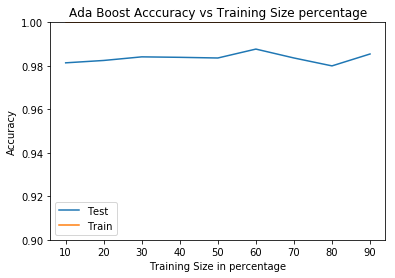

In [8]:
NUM_TIMS_TO_RUN=1
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TRAIN_SIZE):
        base_estimator= DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10)
        clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier()
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i*10,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i*10,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.9,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost Acccuracy vs Training Size percentage')
plt.legend()
plt.show()

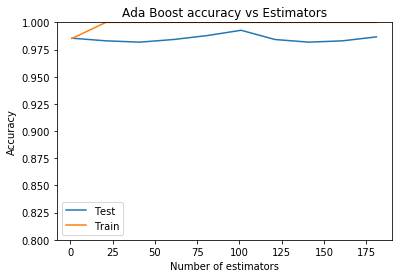

In [9]:

NUM_TIMS_TO_RUN=1
ESTIMATORS=200
TREE_DEPTH=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,ESTIMATORS,20):
        base_estimator= DecisionTreeClassifier(max_depth=i, max_leaf_nodes=10)
        clf = AdaBoostClassifier(n_estimators=i, learning_rate=1, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
#print train_accuracy_list, test_accuracy_list

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost accuracy vs Estimators')
plt.legend()
plt.show()
#print sum_train_accuracy_list, avg_test_prediction

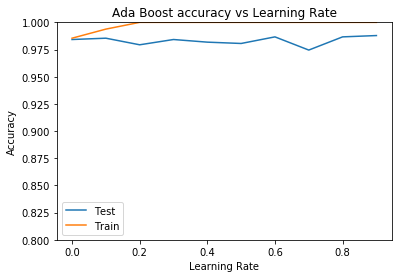

In [10]:
NUM_TIMS_TO_RUN=1
LEARNING_RATE=10000
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list= []
    for i in range(1,LEARNING_RATE,1000):
        base_estimator= DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10)
        lr=i/10000.0
        clf = AdaBoostClassifier(n_estimators=50, learning_rate=lr, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([lr,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([lr,clf.score(train_data,train_target)])
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost accuracy vs Learning Rate')
plt.legend()
plt.show()
#print sum_train_accuracy_list, avg_test_prediction

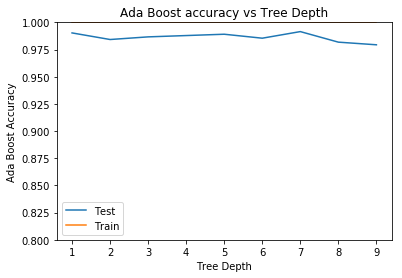

In [11]:
NUM_TIMS_TO_RUN=1
ESTIMATORS=200
TREE_DEPTH=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TREE_DEPTH,1):
        base_estimator= DecisionTreeClassifier(max_depth=i, max_leaf_nodes=10)
        clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
#print train_accuracy_list, test_accuracy_list

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Tree Depth')
plt.ylabel('Ada Boost Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost accuracy vs Tree Depth')
plt.legend()
plt.show()
#print sum_train_accuracy_list, avg_test_prediction

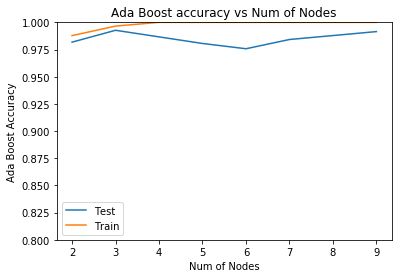

In [12]:
NUM_TIMS_TO_RUN=1
ESTIMATORS=200
MAX_LEAF_NODE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(2,MAX_LEAF_NODE,1):
        base_estimator= DecisionTreeClassifier(max_depth=3, max_leaf_nodes=i)
        clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
#print train_accuracy_list, test_accuracy_list

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Num of Nodes')
plt.ylabel('Ada Boost Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost accuracy vs Num of Nodes')
plt.legend()
plt.show()
#print sum_train_accuracy_list, avg_test_prediction

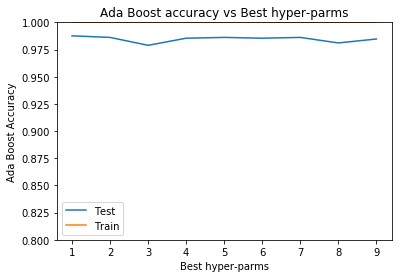

In [13]:
NUM_TIMS_TO_RUN=1
ESTIMATORS=200
TREE_DEPTH=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TREE_DEPTH,1):
        base_estimator= DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)
        clf = AdaBoostClassifier(n_estimators=100, learning_rate=.3, base_estimator=base_estimator)
        #clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
#print train_accuracy_list, test_accuracy_list

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Best hyper-parms')
plt.ylabel('Ada Boost Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Ada Boost accuracy vs Best hyper-parms')
plt.legend()
plt.show()
#print sum_train_accuracy_list, avg_test_prediction

In [14]:
print sum_train_accuracy_list, avg_test_prediction

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]] [[ 1.          0.98761835]
 [ 2.          0.98616169]
 [ 3.          0.97887837]
 [ 4.          0.98543336]
 [ 5.          0.98616169]
 [ 6.          0.98543336]
 [ 7.          0.98616169]
 [ 8.          0.98106336]
 [ 9.          0.98470503]]


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

param_grid = {"base_estimator__max_depth" : [1]),
              "base_estimator__max_leaf_nodes" :   [3],
              "n_estimators": [200,800,1000],
             }



ABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

#create a grid
grid_tree = GridSearchCV(ABC, param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(train_data, train_target)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(test_data)
print("Test score: {}%".format(round(accuracy_score(y_true = test_target, y_pred = predictions) * 100,3)))



Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\rosha\Anaconda2\envs\skLearn\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\rosha\Anaconda2\envs\skLearn\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\externals\joblib\externals\loky\backend\queues.py", line 175, in _feed
    onerror(e, obj)
  File "C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 310, in _on_queue_feeder_error
    self.thread_wakeup.wakeup()
  File "C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 153, in wakeup
    self._writer.send_bytes(b"0")
IOError: [Errno 6] The handle is invalid



KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# features_list = np.array(list(fraud_data))
# feature_importance = best_tree.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# print feature_importance, sorted_idx
# features_list[sorted_idx]
# print features_list
# plt.figure(figsize=(5,7))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
# plt.xlabel('Importance')
# plt.title('Feature importances')
# plt.draw()
# plt.show()